# Keypoints demo - load and visualize

This notebook demonstrates how to load and visualize keypoints data saved using Facemap. 

#### Import packages

In [5]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
sys.path.insert(0,  '/home/stringlab/Facemap/facemap')
from facemap import utils
from facemap.pose import refine_pose

### Load data

In [2]:
keypoints_filepath = '/home/stringlab/Desktop/head-mounted/S3_cropped_FacemapPose.h5' # Set your path here

In [3]:
keypoints_data = utils.load_keypoints(refine_pose.BODYPARTS, keypoints_filepath)
print(keypoints_data.shape)
# Keypoints data is a 3D array of shape (3, num_bodyparts, num_frames)
# The first dimension is (x, y, likelihood)

(3, 15, 672)


### Visualize data

In [23]:
pose_x_coord = keypoints_data[0, :, :]
pose_y_coord = keypoints_data[1, :, :]
pose_likelihood = keypoints_data[2, :, :]
colors = cm.get_cmap("jet")(np.linspace(0, 1.0, len(refine_pose.BODYPARTS)))

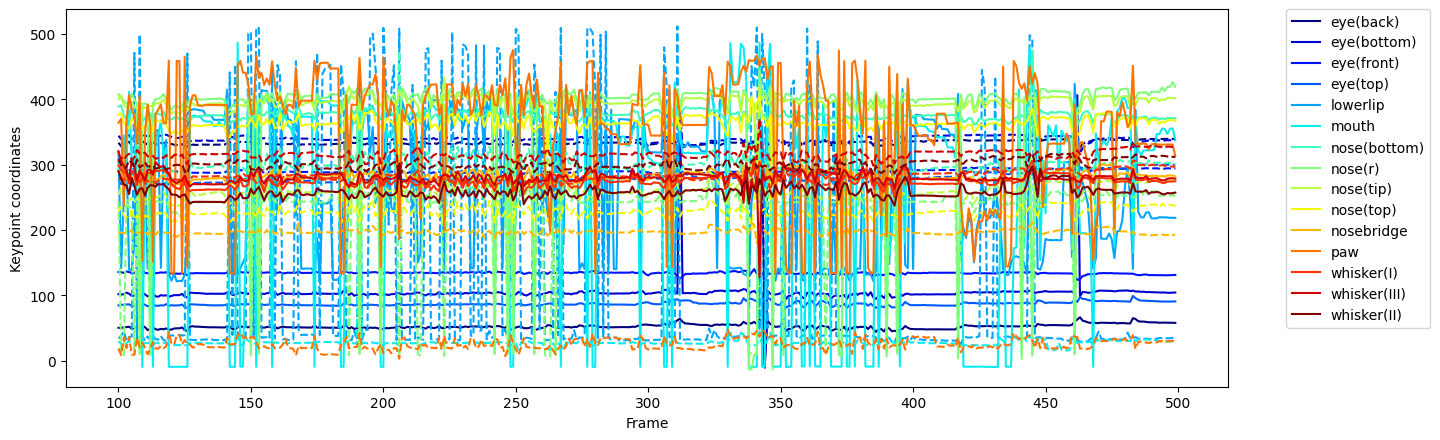

In [59]:
# Plot keypoints for a subset of frames
start_frame = 100
end_frame = 500

plt.figure(figsize=(15, 5), dpi=100)
for i, bodypart in enumerate(refine_pose.BODYPARTS):
    plt.plot(np.arange(start_frame, end_frame), pose_x_coord[i, start_frame:end_frame], '-', c=colors[i], label=bodypart)
    plt.plot(np.arange(start_frame, end_frame), pose_y_coord[i, start_frame:end_frame], '--', c=colors[i])
plt.xlabel('Frame')
plt.ylabel('Keypoint coordinates')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

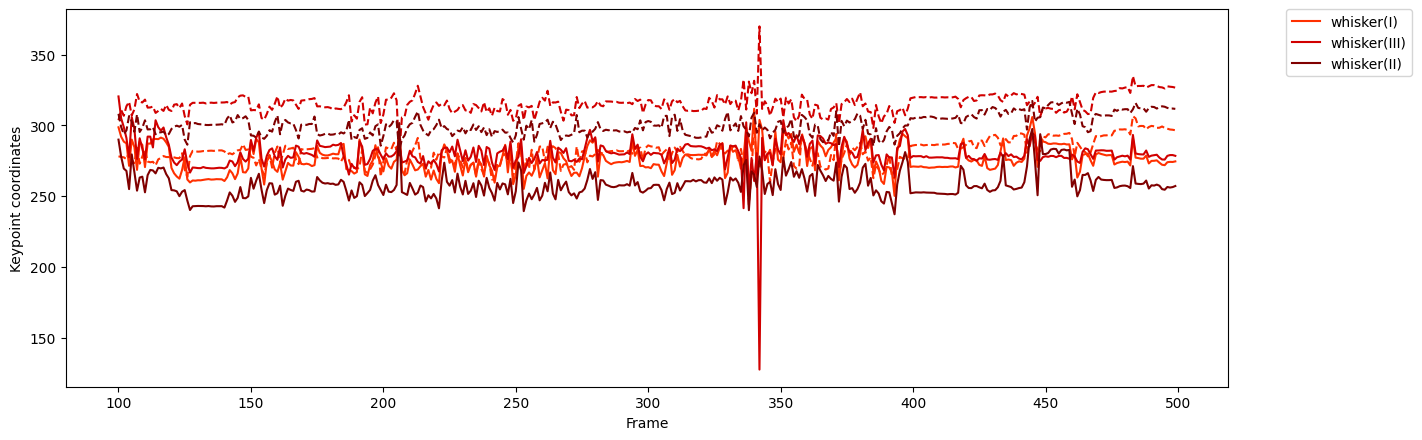

In [60]:
# Plot a subset of keypoints for a subset of frames
subset_bodyparts = ["whisker(I)",  "whisker(II)", "whisker(III)"]
start_frame = 100
end_frame = 500

plt.figure(figsize=(15, 5), dpi=100)
for i, bodypart in enumerate(refine_pose.BODYPARTS):
    if bodypart in subset_bodyparts:
        plt.plot(np.arange(start_frame, end_frame), pose_x_coord[i, start_frame:end_frame], '-', c=colors[i], 
                 label=bodypart)
        plt.plot(np.arange(start_frame, end_frame), pose_y_coord[i, start_frame:end_frame], '--', c=colors[i])
plt.xlabel('Frame')
plt.ylabel('Keypoint coordinates')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

### Filter keypoints data by confidence 

Apply median filter to the keypoints data to remove outliers.

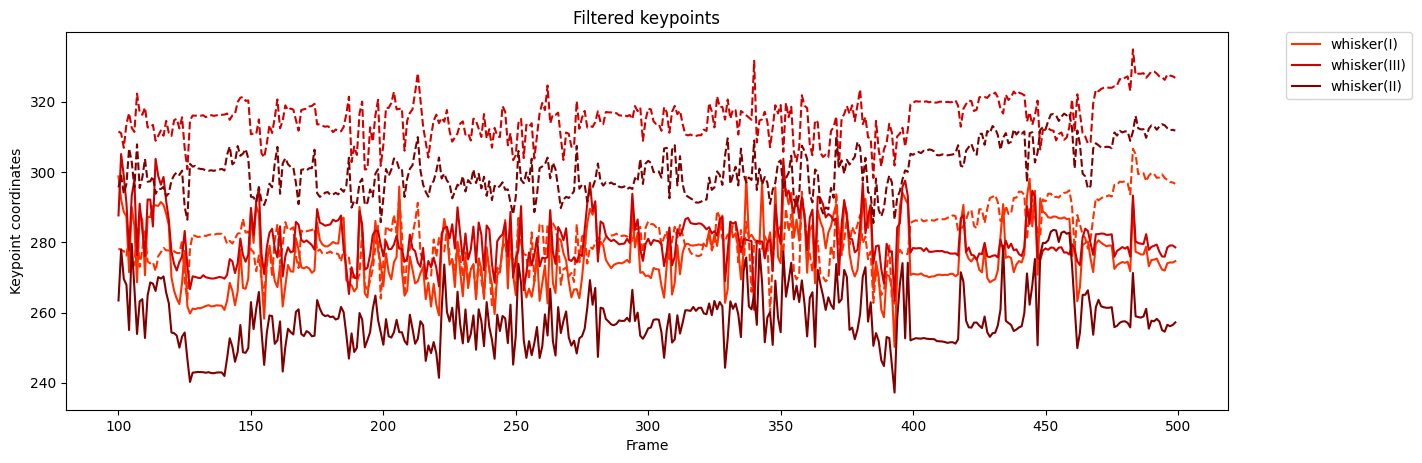

In [66]:
# Use the following function to filter outliers in the keypoints data (see docstring for details)
"""
utils.filter_outliers(x, y, filter_window=15, baseline_window=50, max_spike=25, max_diff=25)
x: x coordinates of keypoints
y: y coordinates of keypoints
filter_window: window size for median filter (default: 15)
baseline_window: window size for baseline estimation (default: 50)
max_spike: maximum spike size (default: 25)
max_diff: maximum difference between baseline and filtered signal (default: 25)
"""

plt.figure(figsize=(15, 5), dpi=100)
for i, bodypart in enumerate(refine_pose.BODYPARTS):
    if bodypart in subset_bodyparts:
        x, y = utils.filter_outliers(pose_x_coord[i], pose_y_coord[i])
        plt.plot(np.arange(start_frame, end_frame), x[start_frame:end_frame], '-', c=colors[i], label=bodypart)
        plt.plot(np.arange(start_frame, end_frame), y[start_frame:end_frame], '--', c=colors[i])
plt.xlabel('Frame')
plt.ylabel('Keypoint coordinates')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Filtered keypoints')
plt.show()